# All KNN
Machine Learning with Imbalanced Data - Course

* Adapts the functionality of Edited Nearest Neighbours in that, at each round, it increases the number of neighbours utilised to exclude or retain the observations.
* It starts by looking at the 1 closest neighbour.
* It finishes at a maximum number of neighbours to examine, determined by the user
* It stops prematurely if the majority class becomes the minority

AllKNN is a repetition of ENN, starting by examining the 1 closest neighbour and increasing the neighbourhood by 1 at each round.

The repetitions stop after examining the maximum number of neighbours entered by the user, or when a class disappears or becomes the minority, whatever happens first.

Adding a neighbour at each iteration makes the criteria for a sample to be retained harder and harder, therefore removing more observations that are closer to the boundary to the minority class.

In this notebook, we will compare ENN, RENN, and AllKNN.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, AllKNN

## Create data
We will create data where the classes have different degrees of separateness

In [2]:
def make_data(sep):
    # return arrays
    X, y = make_classification(n_samples=1000,
                               n_features=2,
                               n_redundant=0,
                               n_clusters_per_class=1,
                               weights=[0.99],
                               class_sep=sep,   # how separate the classes are
                               random_state=1,)
    
    # transform arrays into pandas df and series
    X = pd.DataFrame(X, columns=['varA', 'varB'])
    y = pd.Series(y)

    return X, y

0    983
1     17
Name: count, dtype: int64


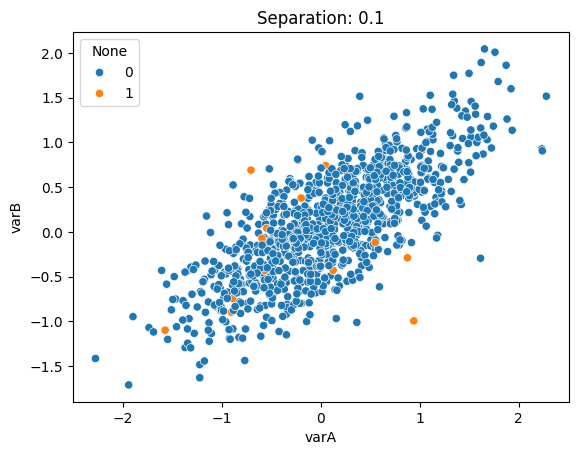

0    983
1     17
Name: count, dtype: int64


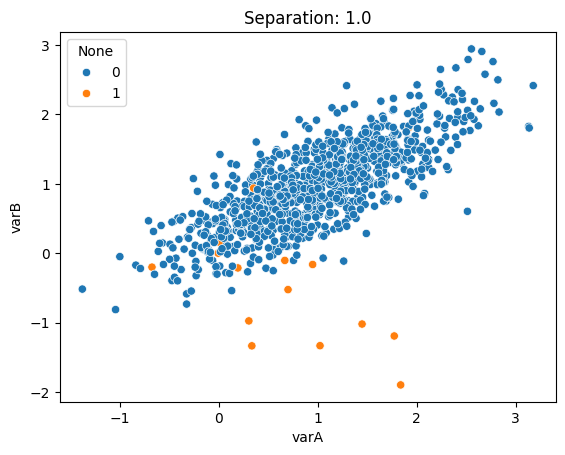

0    983
1     17
Name: count, dtype: int64


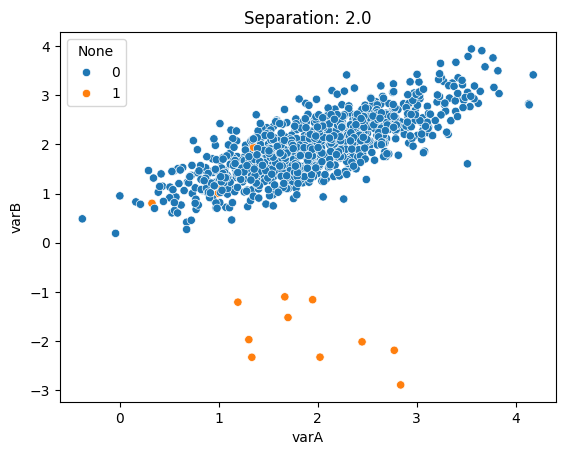

In [3]:
# make datasets with different class separateness
# and plot
for sep in [0.1, 1., 2.]:
    X, y = make_data(sep)
    print(y.value_counts())

    sns.scatterplot(data=X, x='varA', y='varB', hue=y)
    plt.title('Separation: {}'.format(sep))
    plt.show()

As we increase the parameter `sep`, the minority and majority class show less degree of overlap.

## Undersample with AllKNN

### Well separated classes

In [4]:
# create data
X, y = make_data(sep=2)

# set up all KNN
allknn = AllKNN(
    sampling_strategy='auto',
    n_neighbors=5,  # the maximum size of neighbourhood to examine
    kind_sel='all',
    n_jobs=-1
)

X_resampled, y_resampled = allknn.fit_resample(X, y)

In [5]:
# size of original data
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# size of undersampled data
X_resampled.shape, y_resampled.shape

((954, 2), (954,))

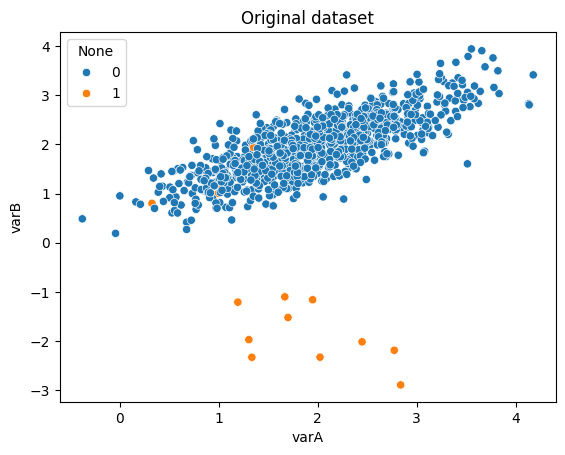

In [7]:
sns.scatterplot(data=X, x='varA', y='varB', hue=y)

plt.title('Original dataset')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

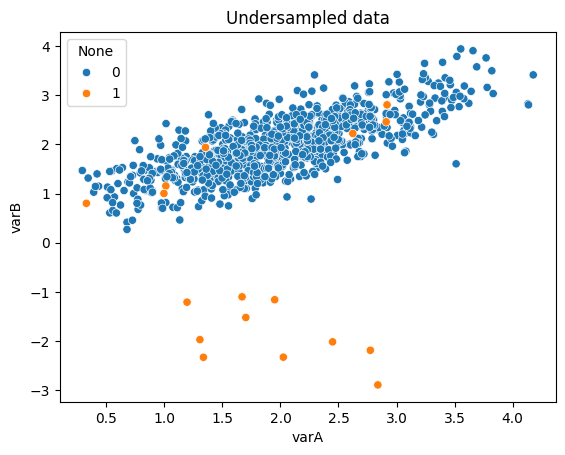

In [8]:
# plot undersampled data
sns.scatterplot(X_resampled, x='varA', y='varB', hue=y_resampled)

plt.title('Undersampled data')
plt.show

Note how some yellow dots can now be seen clearer, as their neighbouring observations from the other class were removed from the dataset.

### Partially separated classes

In [14]:
# create data
X, y = make_data(sep=0.1)

# set up all KNN
allknn = AllKNN(
    sampling_strategy='auto',
    n_neighbors=3,  # the maximum size of neighbourhood to examine
    kind_sel='all',
    n_jobs=-1
)

X_resampled, y_resampled = allknn.fit_resample(X, y)

In [15]:
# size of original data
X.shape, y.shape

((1000, 2), (1000,))

In [16]:
# size of undersampled data
X_resampled.shape, y_resampled.shape

((945, 2), (945,))

As the classes are not so clearly distinguished, more samples were removed from the dataset.

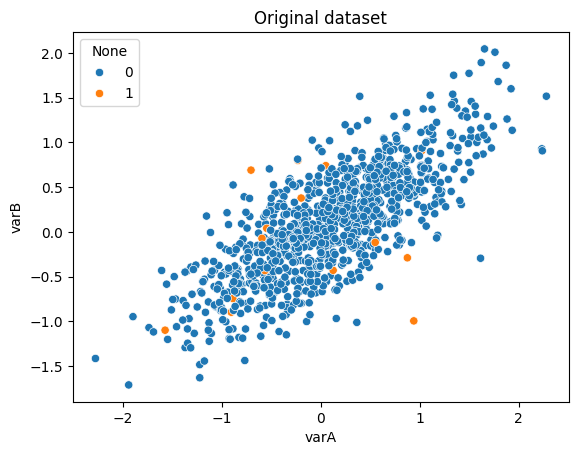

In [17]:
sns.scatterplot(data=X, x='varA', y='varB', hue=y)

plt.title('Original dataset')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

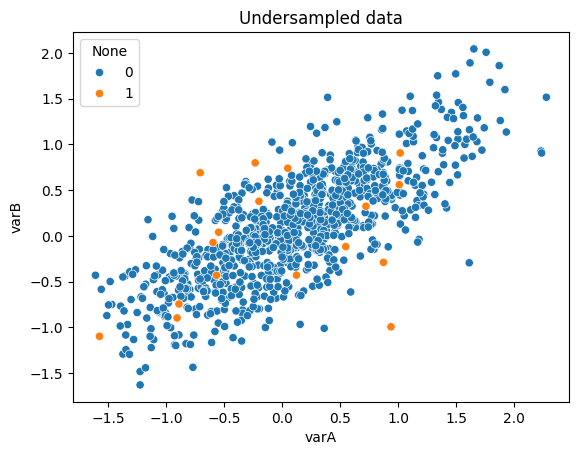

In [18]:
# plot undersampled data
sns.scatterplot(X_resampled, x='varA', y='varB', hue=y_resampled)

plt.title('Undersampled data')
plt.show

Notice again, that observations have been cleared from the surroundings of those of the minority class. 

The closer the classes are, the more observations that are removed.

## All KNN
### Real data - Performance comparison
Does it work well with real datasets?

In [19]:
# Load data
data = pd.read_csv('../datasets/kdd2004.csv')

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [20]:
# imbalanced target
data['target'].value_counts(normalize=True)

target
-1    0.991108
 1    0.008892
Name: proportion, dtype: float64

In [21]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [22]:
# edited nearest neighbours
enn = EditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=5,
    kind_sel='all',
    n_jobs=-1
)

X_enn, y_enn = enn.fit_resample(X_train, y_train)

In [23]:
# repeated ENN
renn = RepeatedEditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=5,
    kind_sel='all',
    n_jobs=-1,
    max_iter=100,
)

X_renn, y_renn = renn.fit_resample(X_train, y_train)

In [24]:
# all KNN
allknn = AllKNN(
    sampling_strategy='auto',
    n_neighbors=5,
    kind_sel='all',
    n_jobs=-1,
)

X_allknn, y_allknn = allknn.fit_resample(X_train, y_train)

In [25]:
# compare shapes
X_train.shape, X_enn.shape, X_renn.shape, X_allknn.shape

((102025, 74), (100700, 74), (100500, 74), (100546, 74))

## Machine learning performance comparison

In [26]:
# function to train random forests and evaluate the performance
def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [27]:
# evaluate performance of algorithm built
# using imbalanced dataset
run_randomForests(X_train, X_test, y_train, y_test)

Train set
Random Forests roc-auc: 0.9736769545142595
Test set
Random Forests roc-auc: 0.9724711107235364


In [28]:
# evaluate performance of algorithm built
# using undersampled dataset - enn
run_randomForests(X_enn, X_test, y_enn, y_test)

Train set
Random Forests roc-auc: 0.9740952694393767
Test set
Random Forests roc-auc: 0.9728110080333405


In [29]:
# evaluate performance of algorithm built
# using undersampled dataset - renn
run_randomForests(X_renn, X_test, y_renn, y_test)

Train set
Random Forests roc-auc: 0.9732937885899299
Test set
Random Forests roc-auc: 0.9716230345901867


In [30]:
# evaluate performance of algorithm built
# using undersampled dataset - all KNN
run_randomForests(X_allknn, X_test, y_allknn, y_test)

Train set
Random Forests roc-auc: 0.9744925830253544
Test set
Random Forests roc-auc: 0.9733000076090033


There doesn't seem to be a huge change in performance with these algorithms on this dataset.